In [ ]:
# Importation des bibliothèques nécessaires
from sklearn.datasets import fetch_openml  # Permet de récupérer des ensembles de données depuis OpenML



. Chargement du jeu de données MNIST

In [ ]:
# Charger les données MNIST (jeu de données des chiffres écrits à la main)
mnist = fetch_openml('mnist_784', data_home='./scikit_learn_data')
#L'objet mnist contient deux entrées principales, data et target , on peut les afficher
mnist.data.shape
mnist.target.shape


(70000,)

Sélection aléatoire de 5000 exemples

In [ ]:
# Sélection aléatoire de 5000 exemples à partir du jeu de données complet pour accélérer les calculs
sample = np.random.randint(data.shape[0], size=5000)  # Génère 5000 indices aléatoires
x = data[sample]  # Sélectionne les images correspondant aux indices générés
y = target[sample]  # Sélectionne les étiquettes correspondantes


 Division en ensembles d'entraînement et de test

In [ ]:
# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement, 20% pour le test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Création du modèle KNN

In [ ]:
# Création du modèle KNN avec 3 voisins
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3)


Entraînement du modèle

In [ ]:
# Entraînement du modèle sur les données d'entraînement
knn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

 Évaluation de la précision

In [ ]:
error = 1- knn.score(x_test,y_test)
print('Erreur: %f' % error)

Erreur: 0.065000


Importation des bibliothèques nécessaires

In [ ]:
import numpy as np  # Manipulation des matrices et tableaux
import matplotlib.pyplot as plt  # Pour afficher des graphiques et des images
from sklearn.datasets import fetch_openml  # Charger des ensembles de données de OpenML
from sklearn.neighbors import KNeighborsClassifier  # Algorithme de K-Nearest Neighbors
from sklearn.model_selection import train_test_split  # Diviser les données en entraînement et test
from sklearn.metrics import accuracy_score  # Mesurer la précision du modèle


Chargement des données MNIST

In [ ]:
# Charger les données MNIST (28x28 pixels de chiffres manuscrits) depuis OpenML
mnist = fetch_openml('mnist_784', data_home='./scikit_learn_data')


 Conversion en tableau NumPy

In [ ]:
# Convertir les données et les cibles en tableaux NumPy pour faciliter la manipulation
data = mnist.data.to_numpy()  # Les images de 28x28 pixels
target = mnist.target.to_numpy()  # Les étiquettes (les chiffres représentés)


Sélection d'un échantillon de 5000 données

In [ ]:
# Sélection d'un échantillon aléatoire de 5000 images pour réduire le temps de calcul
sample = np.random.randint(data.shape[0], size=5000)
x = data[sample]  # Sélectionner les images
y = target[sample]  # Sélectionner les étiquettes associées


 Division en ensemble d'entraînement et de test

In [ ]:
# Diviser les données en 80% pour l'entraînement et 20% pour le test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Initialisation et test du modèle KNN

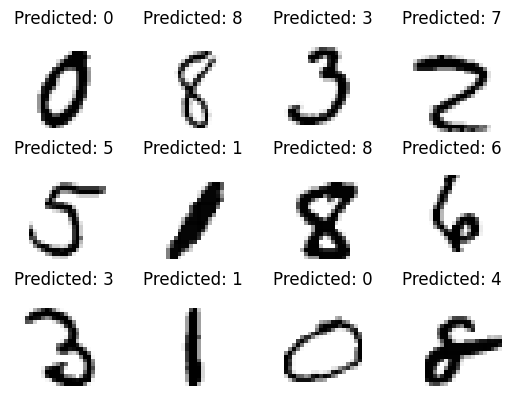

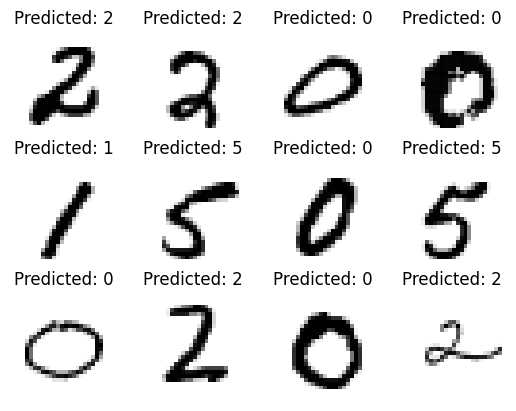

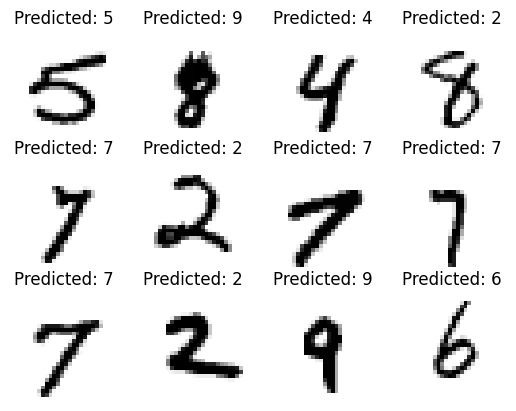

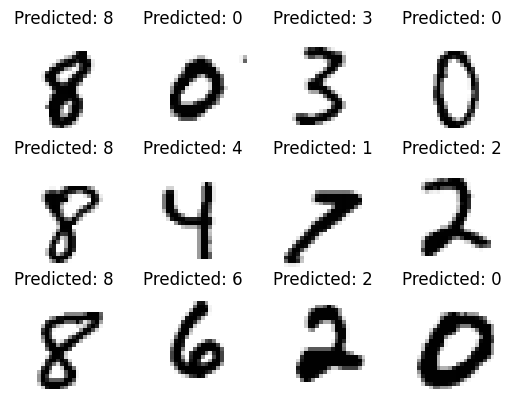

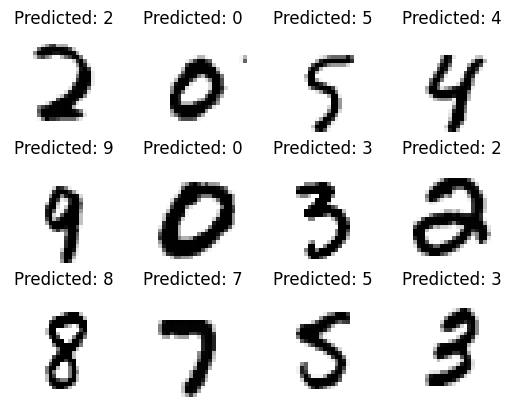

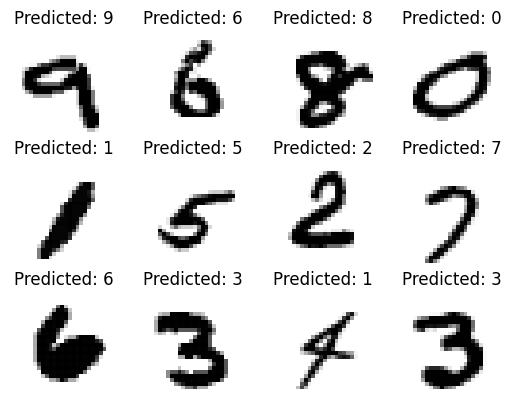

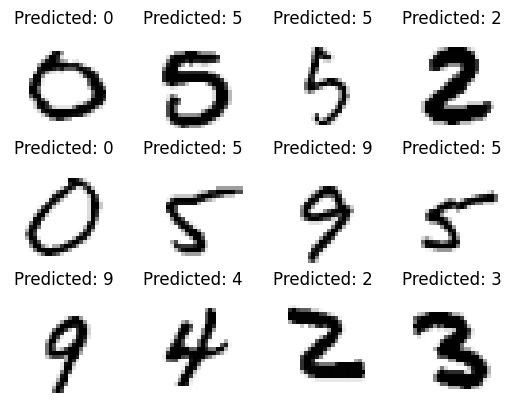

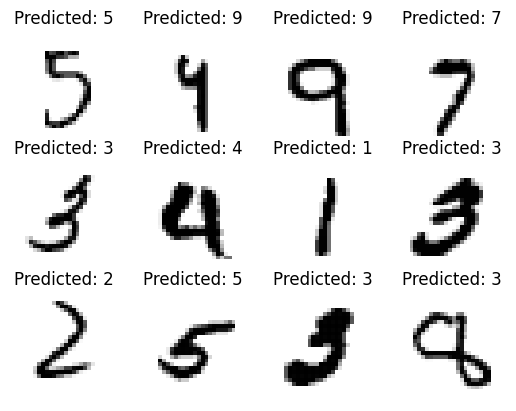

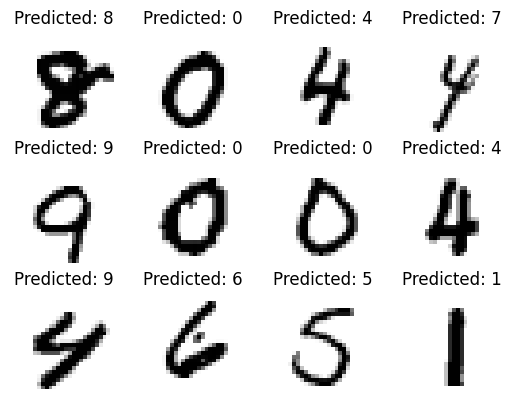

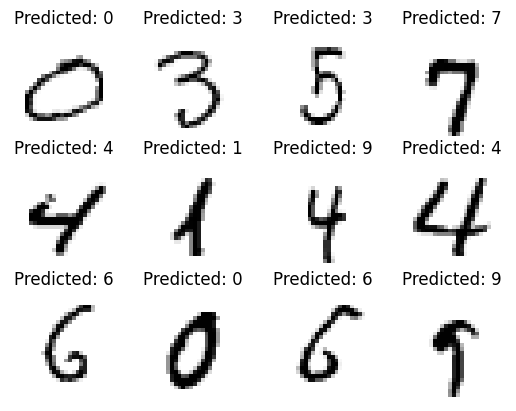

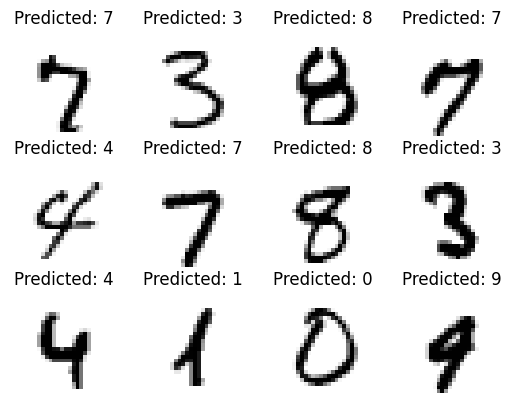

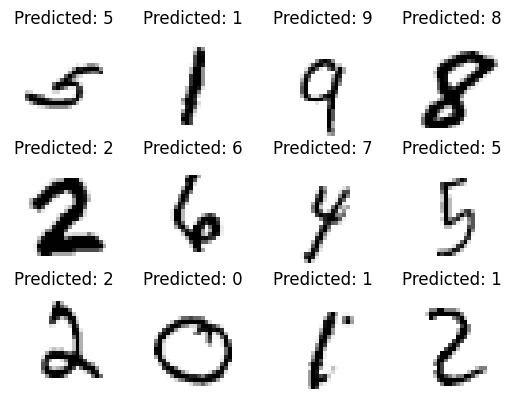

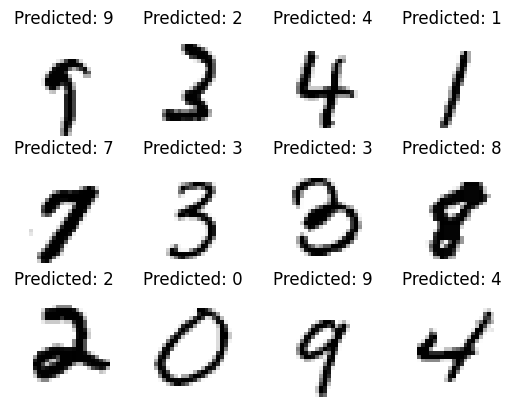

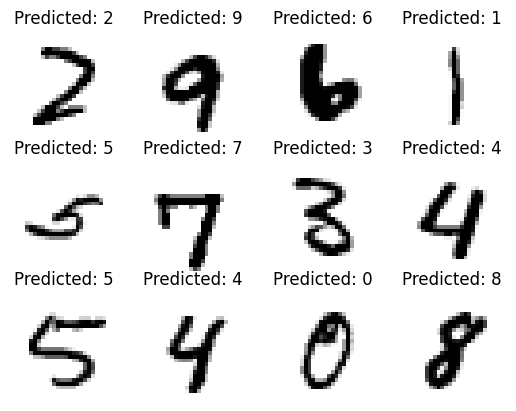

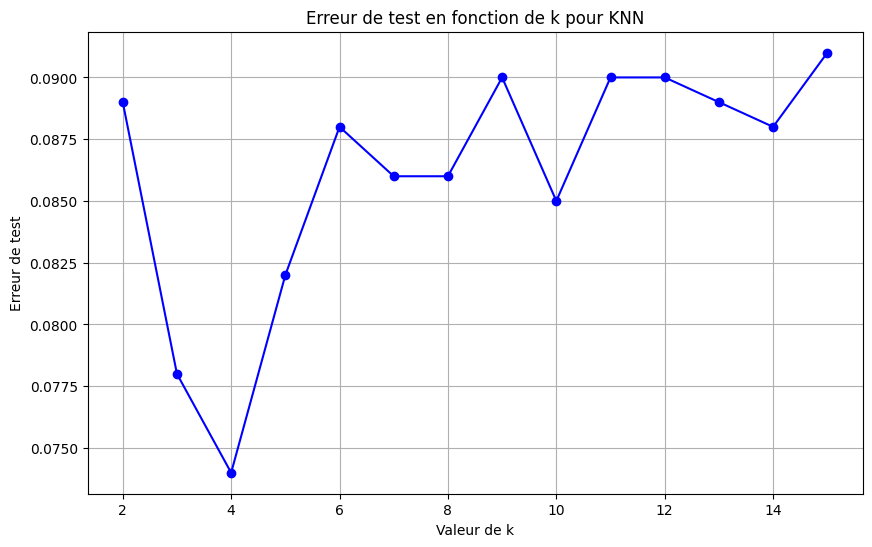

In [ ]:
# Liste pour stocker les erreurs (pour chaque valeur de k)
errors = []

# Tester les valeurs de k de 2 à 15
k_values = range(2, 16)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)  # Créer un modèle KNN avec k voisins
    knn.fit(x_train, y_train)  # Entraîner le modèle sur les données d'entraînement
    y_pred = knn.predict(x_test)  # Prédire les étiquettes des données de test
    # Reshaper les images pour les afficher (chaque image est de taille 28x28)
    images = x_test.reshape((-1, 28, 28))

    # Sélectionner 12 images aléatoires du test pour les visualiser
    select = np.random.randint(images.shape[0], size=12)

    # Afficher les 12 images sélectionnées avec les prédictions associées
    for index, value in enumerate(select):
        plt.subplot(3, 4, index+1)
        plt.axis('off')  # Masquer les axes pour une meilleure visualisation
        plt.imshow(images[value], cmap=plt.cm.gray_r, interpolation="nearest")
        plt.title(f'Predicted: {y_pred[value]}')

    plt.show()  # Afficher les images et les prédictions
    # Calculer l'erreur pour cette valeur de k
    error = 1 - accuracy_score(y_test, y_pred)  # 1 - Précision = Erreur
    errors.append(error)  # Ajouter l'erreur à la liste des erreurs


# Tracer la courbe de l'erreur en fonction de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title("Erreur de test en fonction de k pour KNN")
plt.xlabel("Valeur de k")
plt.ylabel("Erreur de test")
plt.grid(True)
plt.show()





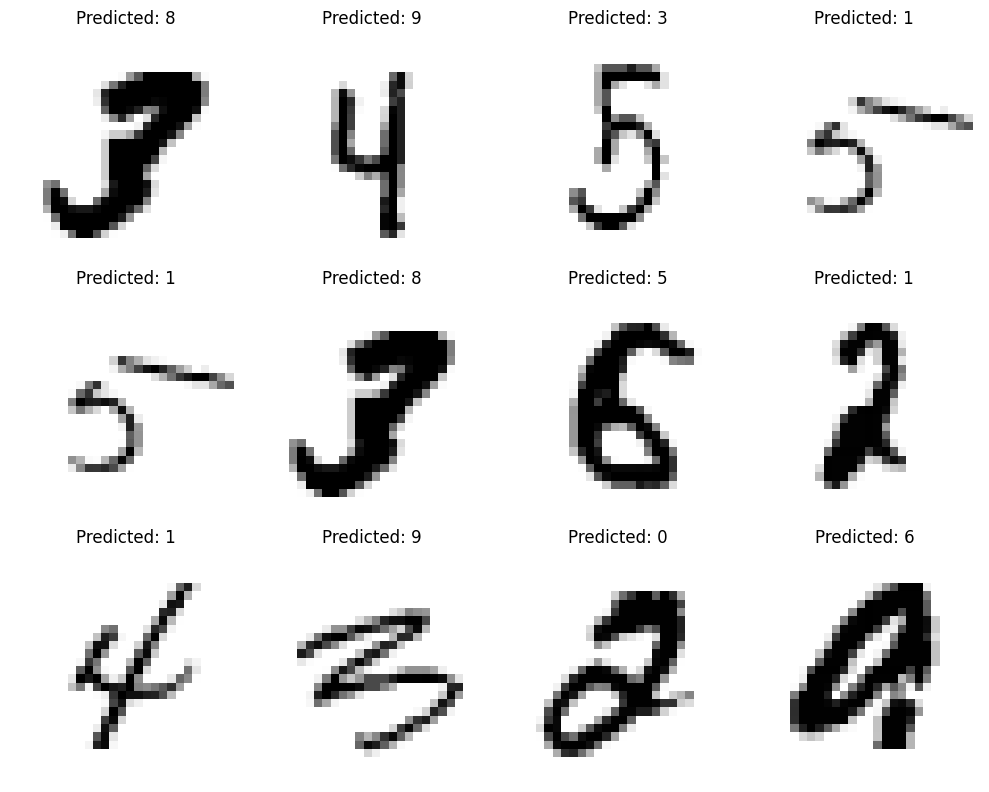

In [ ]:
# Predict on the test set
y_pred = knn.predict(x_test)

# Identify misclassified images
misclass = (y_test != y_pred)

# Extract misclassified images and reshape for visualization
# Since x_test is already a numpy array, just use it directly
misclass_images = x_test[misclass].reshape(-1, 28, 28)  # Reshape for visualization
misclass_predicted = y_pred[misclass]

# Select 12 random misclassified images for visualization
select = np.random.randint(misclass_images.shape[0], size=12)

# Visualize the selected misclassified images and their predicted labels
plt.figure(figsize=(10, 8))
for index, value in enumerate(select):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(misclass_images[value], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title(f'Predicted: {misclass_predicted[value]}')

plt.tight_layout()
plt.show()


Taille des données: (70000, 784), Taille des labels: (70000,)
Taille de l'échantillon: (5000, 784), (5000,)
Taille du training set: (4000, 784), (4000,)
Taille du testing set: (1000, 784), (1000,)
Accuracy pour k=3: 0.937
Erreur pour k=2: 0.08599999999999997
Erreur pour k=3: 0.06299999999999994
Erreur pour k=4: 0.06599999999999995
Erreur pour k=5: 0.06399999999999995
Erreur pour k=6: 0.06399999999999995
Erreur pour k=7: 0.06299999999999994
Erreur pour k=8: 0.06699999999999995
Erreur pour k=9: 0.06799999999999995
Erreur pour k=10: 0.07199999999999995
Erreur pour k=11: 0.06899999999999995
Erreur pour k=12: 0.07699999999999996
Erreur pour k=13: 0.07599999999999996
Erreur pour k=14: 0.07699999999999996
Erreur pour k=15: 0.07699999999999996


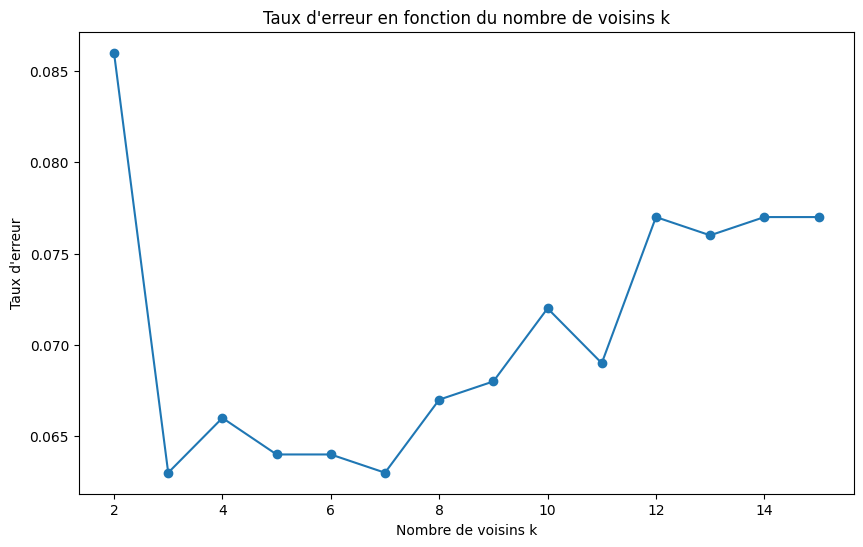

Exemples de prédictions correctes:


KeyError: 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Télécharger et charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)

# Extraire les données et les labels
X = mnist['data']
y = mnist['target']

# Convertir les labels en entiers
y = y.astype(np.int8)

# Afficher la taille du dataset
print(f'Taille des données: {X.shape}, Taille des labels: {y.shape}')

# Échantillonner 5000 images pour simplifier
X_sampled, _, y_sampled, _ = train_test_split(X, y, train_size=5000, random_state=42, stratify=y)

# Afficher la taille de l'échantillon
print(f'Taille de l\'échantillon: {X_sampled.shape}, {y_sampled.shape}')

# Séparer les données en ensemble d'entraînement (training set) et ensemble de test (testing set)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Afficher la taille des ensembles d'entraînement et de test
print(f'Taille du training set: {X_train.shape}, {y_train.shape}')
print(f'Taille du testing set: {X_test.shape}, {y_test.shape}')

# Créer un classifieur k-NN avec k = 3
knn = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle
knn.fit(X_train, y_train)

# Prédire sur le jeu de test
y_pred = knn.predict(X_test)

# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy pour k=3: {accuracy}')

# Tester plusieurs valeurs de k pour trouver l'optimal
errors = []
k_range = range(2, 16)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)
    print(f'Erreur pour k={k}: {error}')

# Afficher les résultats sous forme de graphique
plt.figure(figsize=(10, 6))
plt.plot(k_range, errors, marker='o')
plt.xlabel('Nombre de voisins k')
plt.ylabel('Taux d\'erreur')
plt.title('Taux d\'erreur en fonction du nombre de voisins k')
plt.show()

# Fonction pour afficher une image
def plot_digit(image, label, prediction):
    plt.imshow(image.reshape(28, 28), cmap="binary")
    plt.title(f"Label: {label}, Prédiction: {prediction}")
    plt.axis("off")

# Afficher des exemples corrects
print("Exemples de prédictions correctes:")
correct = np.where(y_pred == y_test)[0][:5]
for i in correct:
    plot_digit(X_test[i], y_test[i], y_pred[i])
    plt.show()

# Afficher des exemples incorrects
print("Exemples de prédictions incorrectes:")
incorrect = np.where(y_pred != y_test)[0][:5]
for i in incorrect:
    plot_digit(X_test[i], y_test[i], y_pred[i])
    plt.show()
